In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor, Normalize, Compose
import matplotlib.pyplot as plt
import numpy as np

print('PyTorch version:', torch.__version__)
print('PyTorch working with CUDA:', torch.cuda.is_available())

PyTorch version: 2.9.0+cu130
PyTorch working with CUDA: True


In [47]:
# Ordered list of data labels as per Fashion MNIST Documentation
data_labels = ["T-Shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal",
               "Shirt", "Sneaker", "Bag", "Ankle Boot"]

# Data pre-processing transformations
transforms = Compose([
    ToTensor(), 
    Normalize(mean=0.5, std=0.5)
])

# Initialises data
training_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = transforms
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = transforms
)

# Batch Size Hyperparameter (default = 64)
batch_size = 64

# Load the data with automatic shuffling for training
train_loader = DataLoader(training_data, batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size, shuffle=False)


train_images, train_labels = next(iter(train_loader))
test_images, test_labels = next(iter(test_loader))

# Tests
train_expected_size = torch.Size([batch_size,1,28,28])
assert train_images.shape == train_expected_size

expected_label_size = torch.Size([batch_size])
assert train_labels.shape == expected_label_size

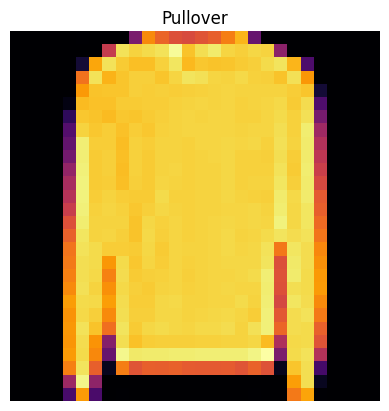

In [48]:
# Plot of random sample with label
img = train_images[0].squeeze()
label = data_labels[train_labels[0]]

fig = plt.imshow(img)
plt.axis('off')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.set_cmap('inferno')
plt.title(label)
plt.show()

In [59]:
class MultilayerPerceptron(nn.Module):
    def __init__(self, hidden1,hidden2,hidden3,in_features=28*28, out_features=10):
        '''
        3-Layer MLP with specifiable hidden layer size
        Args:
            hidden1 (int): specify the number of neurons in layer 1
            hidden2 (int): specify the number of neurons in layer 2
            hidden3 (int): specify the number of neurons in layer 3
            in_features (int/optional): specify the number of inputs (size of flattened image = length * width)
            out_features (int/optional): specify the number of outputs (number of classes)
        '''
        super().__init__()
        self.flatten = nn.Flatten()
        self.lin_relu_stack = nn.Sequential(
            nn.Linear(in_features,hidden1),
            nn.ReLU(),
            nn.Linear(hidden1, hidden2),
            nn.ReLU(),
            nn.Linear(hidden2,hidden3),
            nn.ReLU(),
            nn.Linear(hidden3, out_features),
      )

    def forward(self, x):
        '''
        Perform a forward pass of the network.
        Note: This flattens the image for us so we need not reshape input data.
        Args:
            x (tensor): datapoint from our data
        '''
        x = self.flatten(x)
        output = self.lin_relu_stack(x)
        output = F.softmax(output, dim=1)
        return output

In [60]:
# Initialise model and check structure
ann_model = MultilayerPerceptron(512,256,128)
print(ann_model)

MultilayerPerceptron(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (lin_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [82]:
def train(dataloader, model, loss_fn, optim):
    '''
    Perform a simple training pass for one epoch
    Args:
        dataloader (Dataloader(data)): Dataloader using torchvision
        model (ANN/CNN): Chosen model
        loss_fn: Loss function used
        optim: optimiser used for gradient parameter adjustment
    '''
    model.train()
    size = len(dataloader.dataset)
    num_batch = len(dataloader)
    train_loss = 0
    for batch, (X,label) in enumerate(dataloader):
        optimizer.zero_grad()
        pred = model(X)
        loss = loss_fn(pred, label)
        loss.backward()
        optimizer.step()
        train_loss +=loss.item()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    train_loss /= num_batch
    print(f'Training loss = {train_loss:>5f}')
    return train_loss

def test(dataloader, model):
    '''
    Perform a test pass.
    Args:
        dataloader (DataLoader(data)): Dataloader of a dataset using torchvision
        model (ANN/CNN): Chosen model
    '''
    model.eval()
    num_batch = len(dataloader)

In [73]:
# initial hyperparameters
learn_rate = 1e-3
epochs = 2

# initialise loss function and optimiser
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(ann_model.parameters(), lr=learn_rate)

In [83]:
loss_hist = []
for e in range(epochs):
    print(f'Epoch {e+1}/{epochs}')
    train(train_loader, ann_model, loss_fn, optimizer)
    #loss_hist.append(train_loss)
print(train_loss)

Epoch 1/2
loss: 1.650502  [   64/60000]
loss: 1.633060  [ 6464/60000]
loss: 1.586220  [12864/60000]
loss: 1.679853  [19264/60000]
loss: 1.650713  [25664/60000]
loss: 1.652387  [32064/60000]
loss: 1.638659  [38464/60000]
loss: 1.525944  [44864/60000]
loss: 1.601668  [51264/60000]
loss: 1.745731  [57664/60000]
Training loss = 1.646344
Epoch 2/2
loss: 1.725412  [   64/60000]
loss: 1.633025  [ 6464/60000]
loss: 1.586151  [12864/60000]
loss: 1.595748  [19264/60000]
loss: 1.601627  [25664/60000]
loss: 1.632838  [32064/60000]
loss: 1.633017  [38464/60000]
loss: 1.617401  [44864/60000]
loss: 1.692916  [51264/60000]
loss: 1.586149  [57664/60000]
Training loss = 1.640421


NameError: name 'train_loss' is not defined